In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Mesure de la constante de temps d'un circuit $RC$ série

## 1. Lecture des mesures

In [2]:
from web_sciences import WebSciences

my_init = '''
mode = "temporel";
commandes = [{texte_bouton:"Charge", arduino:"charge"},
                 {texte_bouton:"Décharge", arduino:"decharge"}
                ];

series = [{grandeur: "Uc", unite: "V"}, {grandeur: "E", unite: "V"}];
titre_graphe = "Circuit RC";
axes = [{grandeur: "t", unite: "s"}, {grandeur: "U", unite: "V"}];
'''

interface = WebSciences(my_init)
interface.affiche()

In [2]:
# coller vos valeurs ici
t = [0, 142, 284, 426, 568, 711, 853, 995, 1138, 1280, 1422, 1564, 1706, 
1848, 1991, 2133, 2275, 2418, 2560, 2702, 2844, 2986, 3128, 3271, 3413, 
3555, 3698, 3840, 3982, 4124, 4266, 4408, 4551, 4693, 4835, 4978, 
5120, 5262, 5404, 5546, 5688, 5831, 5973, 6115, 6258, 6400, 6542, 6684, 
6826, 6968]
Uc = [0.00, 0.620, 1.14, 1.61, 2.01, 2.38, 2.69, 2.96, 3.21, 3.42, 3.60, 
3.76, 3.90, 4.04, 4.15, 4.25, 4.34, 4.40, 4.48, 4.54, 4.59, 4.64, 4.67, 
4.72, 4.75, 4.78, 4.79, 4.82, 4.84, 4.85, 4.87, 4.89, 4.90, 4.91, 
4.92, 4.93, 4.93, 4.94, 4.95, 4.95, 4.96, 4.96, 4.97, 4.97, 4.97, 4.98, 
4.98, 4.98, 4.98, 4.98]
E = [4.99, 4.99, 4.99, 4.99, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 4.99, 
5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 
5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 
5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 
5.00, 5.00, 5.00, 5.00]

In [3]:
# calcul de t en secondes
t = [e*1e-3 for e in t]
# calcul de ur (on pourrait aussi utiliser numpy)
Ur = [e-uc for e, uc in zip(E, Uc)]

## 2. Représentation graphique des données

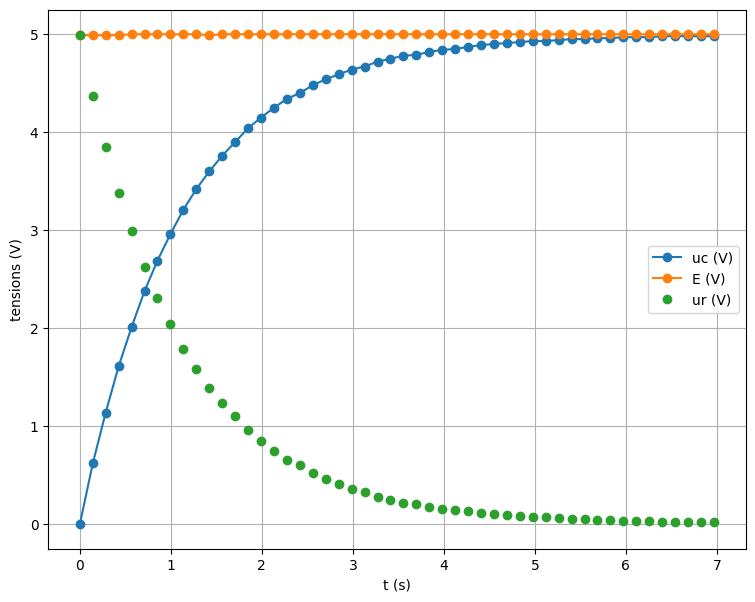

In [7]:
fig_c = plt.figure("Charge d'un condensateur", figsize= (9,7))
plt.clf()
plt.plot(t, Uc, marker = 'o', label = 'uc (V)')
plt.plot(t, E, marker = 'o', label = 'E (V)')
plt.plot(t, Ur, marker = 'o', linestyle='', label = 'ur (V)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.show()

## 3. Mesure de $\tau$

###  $1^{ère}$ méthode : à $t = \tau \; , 63 \%$ du saut de tension a eu lieu

In [8]:
# on recherche l'index de l'élément du tableau uc
# tq uc[k] = np.max(uc)*0.63
i = 0
while Uc[i] <= 4.99*0.63:
    i = i + 1
# print(i)
print(f"La constante de temps est tau =  {t[i]-t[0]:.3f} s" )

La constante de temps est tau =  1.138 s


### $2^{ème}$ méthode: ajustement à une exponentielle

In [9]:
def fonct_ajust(t, d):
    return 5*(1 - np.exp(-t/d))

popt, pcov = curve_fit(fonct_ajust, t, Uc)
# popt
print(f'La valeur de tau est {popt[0]:.3f} s' )

La valeur de tau est 1.119 s


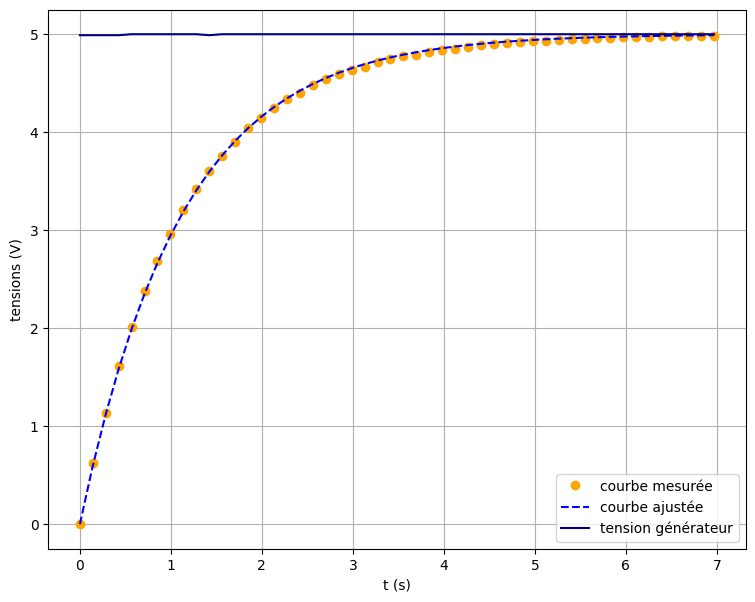

In [10]:
#  Graphe et modélisation
fig3 = plt.figure(figsize= (9,7))
plt.plot(t, Uc, linestyle='', marker ='o', color ='orange', label = 'courbe mesurée')
plt.plot(t, fonct_ajust(np.array(t), *popt), 'b--', label = 'courbe ajustée')
plt.plot(t, E, color='navy', label = 'tension générateur')
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.grid()
plt.show()

## Tracé des graphes $u_C = f(t)$ et $u_R = f(t)$ avec les tangentes 

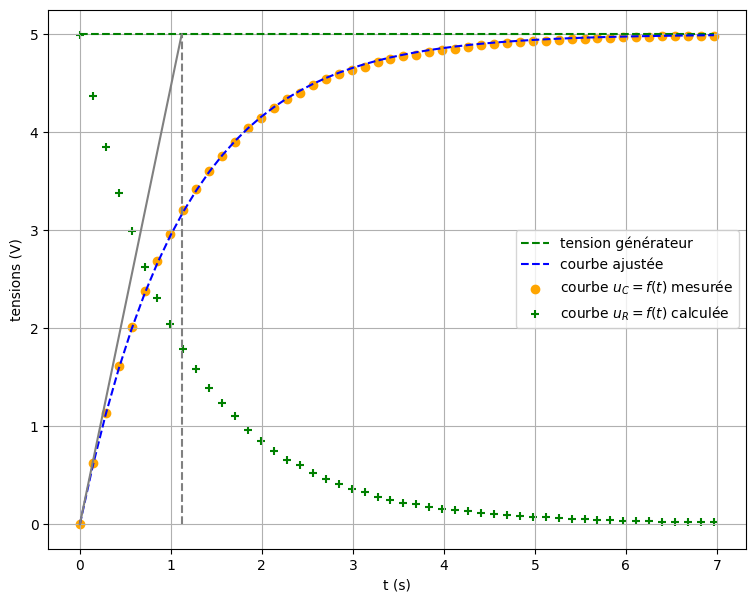

In [11]:
# Avec tracé de la tangente
tau = popt[0]
fig4 = plt.figure(figsize= (9,7))
plt.plot(t, [5.0 for e in t], color='green', linestyle='--', label = 'tension générateur')
plt.plot(t, fonct_ajust(np.array(t), *popt), 'b--', label = 'courbe ajustée')
plt.scatter(t, Uc, marker='o', color = 'orange', label = 'courbe $u_C=f(t)$ mesurée')
plt.scatter(t, Ur, marker='+', color = 'green', label = 'courbe $u_R=f(t)$ calculée')
plt.plot([0, tau], [0, 5], '-', color='grey')
plt.plot([tau, tau], [0, 5], '--', color='grey')
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.grid()
plt.show()